### Diffie - Hellman Key Exchange Simulation
As we already saw, there are functions which are very easy to compute in the "forward" direction but really difficult (computationally) to invert (that is, determine the input from the output). There is a special case: the function may have a hidden "trap door". If you know where that door is, you can invert the function easily. This statement is at the core of modern cryptography.

Look up **Diffie - Hellman key exchange** (here's a [video](https://www.youtube.com/watch?v=cM4mNVUBtHk) on that but feel free to use anything else you might find useful).

Simulate the algorithm you just saw. Generate large enough numbers so the difference is noticeable (say, factoring takes 10-15 seconds). Simulate both participants in the key exchange. Simulate an eavesdropper.

First, make sure after both participants run the algorithm, they have *the same key* (they generate the same number).

Second, see how long it takes for them to exchange keys.

Third, see how long it takes the eavesdropper to arrive at the correct shared secret.

You should be able to see **the power of cryptography**. In this case, it's not that the function is irreversible. It can be reversed, but it takes a really long time (and with more bits, we're talking billions of years). However, if you know something else (this is called a **trap door**), the function becomes relatively easy to invert.

In [1]:
import time
import matplotlib.pyplot as plt
import random

from collections.abc import Callable

GENERATION TIME: 	0.01 ms
Generated private keys are 32, 96. Exchange outputs are 23201871, 38718244. Public key is 11973219
Brute-forced! Private keys are 32, 96
BREAKING TIME: 		0.03 ms

GENERATION TIME: 	0.01 ms
Generated private keys are 108, 117. Exchange outputs are 114236378, 33531515. Public key is 110922833
Brute-forced! Private keys are 108, 117
BREAKING TIME: 		0.04 ms

GENERATION TIME: 	0.72 ms
Generated private keys are 1180, 4544. Exchange outputs are 36822050, 112329808. Public key is 125449145
Brute-forced! Private keys are 1180, 4544
BREAKING TIME: 		14.6 ms

GENERATION TIME: 	94.85 ms
Generated private keys are 71305, 55410. Exchange outputs are 122495608, 133456208. Public key is 40275292
Brute-forced! Private keys are 71305, 55410
BREAKING TIME: 		24852.69 ms



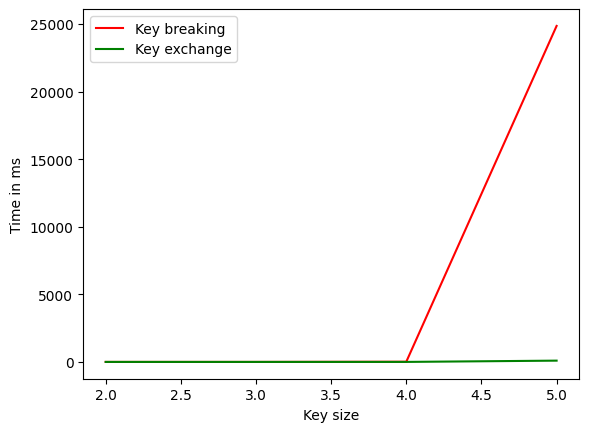

In [2]:
def __generate_random_number(num_of_digits: int):
    range_start = 10**(num_of_digits-1)
    range_end = (10**num_of_digits)-1
    return random.randint(range_start, range_end)

def __produce_exchange_function(power: int, generator: int = 3, prime_modulus: int = 136279841):
    return (generator**power) % prime_modulus

def generate_keys(key_size: int) -> tuple:
    # Measure the time needed for producing and exchanging keys.
    start_time = time.time()

    # Generate two private keys
    a_private_key = __generate_random_number(key_size)
    b_private_key = __generate_random_number(key_size)

    # Exchange the outputs of the exchange function for these two private keys.
    a_output = __produce_exchange_function(a_private_key)
    b_output = __produce_exchange_function(b_private_key)

    # Generate the public key
    a_public_key = __produce_exchange_function(a_private_key, b_output)
    b_public_key = __produce_exchange_function(b_private_key, a_output)

    # Log the time needed for keys generation and exchange.
    generation_time = round((time.time() - start_time)*1000, 2)
    print(f"GENERATION TIME: \t{generation_time} ms")

    # Make sure the two public keys are the same.
    if a_public_key != b_public_key:
        raise Exception(f"Different public keys {a_public_key}, {b_public_key}!")

    return (a_private_key, b_private_key, a_output, b_output, a_public_key, generation_time)

class EavesdropData:
    def __init__(self, exchange_func: Callable, a_output: int, b_output: int, public_key: int):
        self.exchange_func = exchange_func
        self.a_output = a_output
        self.b_output = b_output
        self.public_key = public_key

    def derive_private_keys(self):
        '''Breaks the encryption private keys by simple guessing (brute force).'''
        # Measure the time needed for producing and exchanging keys.
        start_time = time.time()

        for a_pk_candidate in range(1, 1000000):
            if self.exchange_func(a_pk_candidate) == self.a_output:
                if self.exchange_func(a_pk_candidate, self.b_output) == self.public_key:
                    for b_pk_candidate in range(1, 1000000):
                        if self.exchange_func(b_pk_candidate) == self.b_output:
                            if self.exchange_func(b_pk_candidate, self.a_output) == self.public_key:
                                print(f"Brute-forced! Private keys are {a_pk_candidate}, {b_pk_candidate}")
                                break 
                    break
        
        # Log the time needed for keys generation and exchange.
        self.break_time = round((time.time() - start_time)*1000, 2)
        print(f"BREAKING TIME: \t\t{self.break_time} ms\n")

# Simulate the encrypted handshake between two parties.
key_sizes = []
generation_times = []
break_times = []

for key_size in range (2, 6):
    keys = generate_keys(key_size)
    print(f"Generated private keys are {keys[0]}, {keys[1]}. Exchange outputs are {keys[2]}, {keys[3]}. Public key is {keys[4]}")

    # Simulate eavesdrop trying to break the private keys in a brute-force way.
    eavesdrop = EavesdropData(__produce_exchange_function, keys[2], keys[3], keys[4])
    eavesdrop.derive_private_keys()

    # Keep the times for plotting purposes.
    key_sizes.append(key_size)
    generation_times.append(keys[5])
    break_times.append(eavesdrop.break_time)

plt.plot(key_sizes, break_times, c = 'r', label = 'Key breaking')
plt.plot(key_sizes, generation_times, c = 'g', label = 'Key exchange')
plt.xlabel("Key size")
plt.ylabel("Time in ms")
plt.legend()
plt.show()

#### Observation

We observe exponential growth of the time, needed to break the private keys. Thus making it computationally impossible for large numbers (keys of 10-digits and above).